## Loading the Dataset

In [ ]:
import numpy as np
import pandas as pd
from urllib.request import urlretrieve
import zipfile

urlretrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()
print("Done. Dataset contains:")
print(zip_ref.read('ml-100k/u.info'))

# Load each data set (users, movies, and ratings).
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(
   'ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
   'ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

genre_cols = [
   "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
   "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
   "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
movies_cols = [
   'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"
] + genre_cols
# The movies file contains a binary feature for each genre.
movies = pd.read_csv(
   'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

Done. Dataset contains:
b'943 users\n1682 items\n100000 ratings\n'


## Preprocessing and EDA:

#### on users df

In [ ]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
# one hot encoding sex and occupation
users = pd.get_dummies(users, columns=['sex'], prefix='', prefix_sep='')
users = pd.get_dummies(users, columns=['occupation'], prefix='', prefix_sep='')
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [ ]:
users.isnull().sum()

,0
user_id,0
age,0
zip_code,0
F,0
M,0
administrator,0
artist,0
doctor,0
educator,0
engineer,0


#### on ratings df

In [ ]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
ratings.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [ ]:
ratings.isnull().sum()

,0
user_id,0
movie_id,0
rating,0
unix_timestamp,0


#### on movies df

In [ ]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,genre_unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
movies.describe()

,movie_id,video_release_date,genre_unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
movies.isnull().sum()

,0
movie_id,0
title,0
release_date,1
video_release_date,1682
imdb_url,3
genre_unknown,0
Action,0
Adventure,0
Animation,0
Children,0


In [ ]:
movies.drop('video_release_date', axis=1, inplace=True) # column has all nulls
movies.drop('imdb_url', axis=1, inplace=True) # column is irrelevant to analysis

# row with movie_id 267 has title unknown, genre unknown, and release date n/a
movies.drop(movies[movies["movie_id"] == 267].index, inplace=True)
movies.isnull().sum()

,0
movie_id,0
title,0
release_date,0
genre_unknown,0
Action,0
Adventure,0
Animation,0
Children,0
Comedy,0
Crime,0


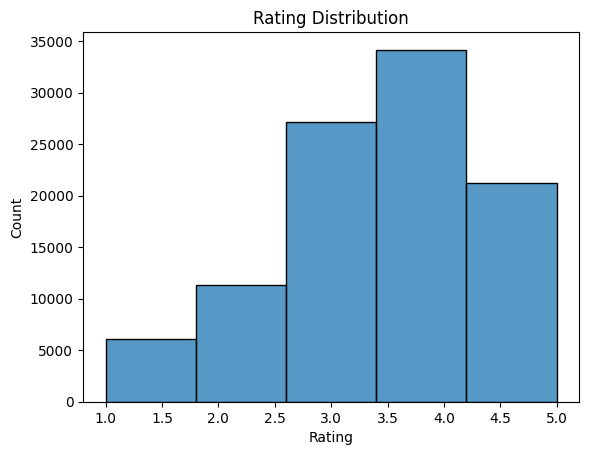

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting rating distribution
sns.histplot(ratings['rating'], bins=5, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

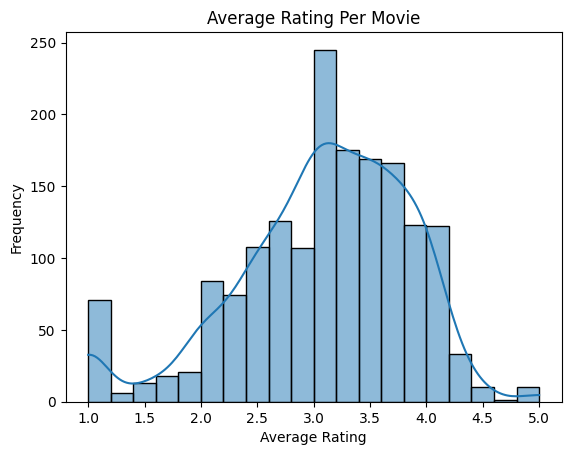

In [ ]:
average_ratings = ratings.groupby('movie_id')['rating'].mean()
sns.histplot(average_ratings, kde=True, bins=20)
plt.title("Average Rating Per Movie")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

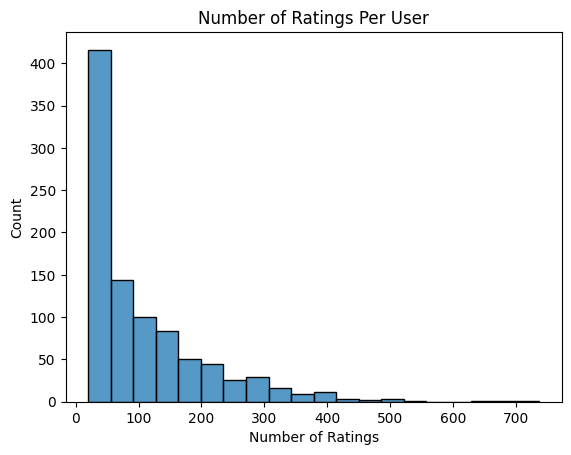

In [ ]:
ratings_per_user = ratings.groupby('user_id')['rating'].count()
sns.histplot(ratings_per_user, kde=False, bins=20)
plt.title("Number of Ratings Per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Count")
plt.show()

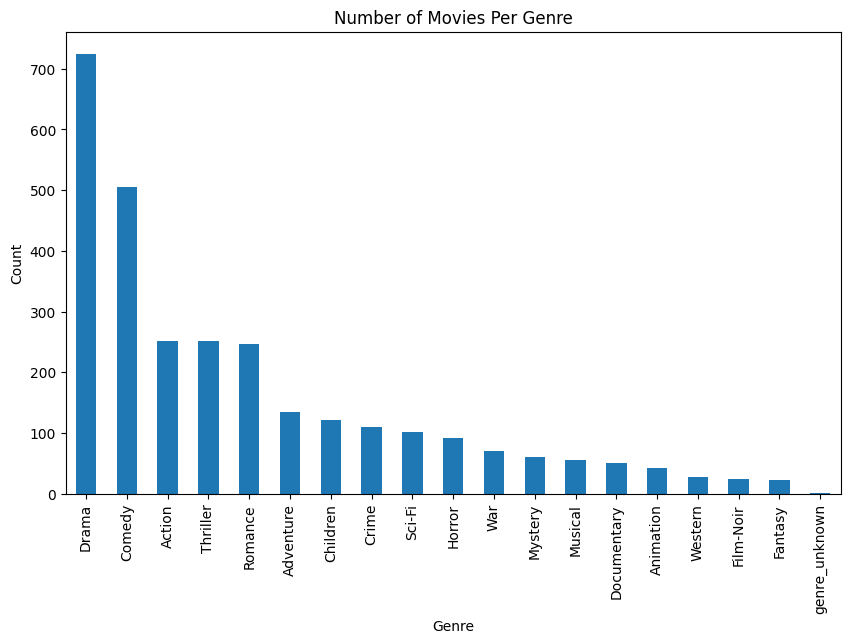

In [ ]:
genre_counts = movies[genre_cols].sum().sort_values(ascending=False)
genre_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Movies Per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

## Reguralized Matrix Factorization

In [ ]:
def matrix_factorization(R, k, steps=100, alpha=0.01, lambd=0.02):
    """
    Performs matrix factorization using SGD.

    Args:
        R (numpy.ndarray): User-item rating matrix.
        k (int): Number of latent features.
        steps (int): Number of iterations.
        alpha (float): Learning rate.
        lambd (float): Regularization parameter.

    Returns:
        P, Q: User and movie latent feature matrices.
    """

    num_users, num_movies = R.shape
    P = np.random.rand(num_users, k)  # user latent factors
    Q = np.random.rand(num_movies, k) # movie latent factors

    for step in range(steps):
        for u in range(num_users):
            for i in range(num_movies):
                if R[u, i] > 0:  # update only observed ratings
                    e_ui = R[u, i] - np.dot(P[u, :], Q[i, :].T)
                    P[u, :] += alpha * (e_ui * Q[i, :] - lambd * P[u, :])
                    Q[i, :] += alpha * (e_ui * P[u, :] - lambd * Q[i, :])

        # calculate the loss for monitoring
        if step % 10 == 0:
            loss = 0
            for u in range(num_users):
                for i in range(num_movies):
                    if R[u, i] > 0:
                        loss += (R[u, i] - np.dot(P[u, :], Q[i, :].T)) ** 2
            loss += lambd * (np.linalg.norm(P) + np.linalg.norm(Q))
            print(f"Iteration {step}, Loss: {loss}")

    return P, Q

In [ ]:
def recommend(user_id, P, Q, R, top_n=10):
    """
    Recommends top N movies for a given user.

    Args:
        user_id (int): User ID.
        P (numpy.ndarray): User latent feature matrix.
        Q (numpy.ndarray): Movie latent feature matrix.
        R (numpy.ndarray): Original user-item rating matrix.
        top_n (int): Number of recommendations.

    Returns:
        list: Top N recommended movie indices for the user.
    """

    predicted_ratings = np.dot(P, Q.T)
    user_ratings = predicted_ratings[user_id]
    rated_indices = np.where(R[user_id] > 0)[0]
    unrated_indices = [i for i in range(len(user_ratings)) if i not in rated_indices]

    # getting top_n recommendations
    recommendations = sorted(unrated_indices, key=lambda x: user_ratings[x], reverse=True)[:top_n]
    return recommendations

### Training

In [ ]:
user_item_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
k = 20
steps = 100
alpha = 0.01
lambd = 0.02

P, Q = matrix_factorization(user_item_matrix.values, k, steps=steps, alpha=alpha, lambd=lambd)

Iteration 0, Loss: 179420.69817683147
Iteration 10, Loss: 67134.79059782831
Iteration 20, Loss: 52286.3024150842
Iteration 30, Loss: 45673.862460853015
Iteration 40, Loss: 42099.09888990835
Iteration 50, Loss: 39887.313622147005
Iteration 60, Loss: 38386.17089622821
Iteration 70, Loss: 37296.386239880405
Iteration 80, Loss: 36468.57457648821
Iteration 90, Loss: 35821.52032368499


**Interpreting the loss value of 35821:**

- The loss value depends on the scale of the ratings and the number of observations in the matrix.
- For our dataset, we had about 100,000 ratings with values between 1 and 5.
- If predictions are off by an average of 1 rating point, SSE will be roughly $100,000\times 1^2 = 100,000$, so a loss of $35,821$ could indicate relatively small errors

### Testing

In [ ]:
test_user_id = 5 # replace with any valid user_id you want to test

recommendations = recommend(test_user_id, P, Q, user_item_matrix.values, top_n=10)
print("Recommended Movie Indices:", recommendations)

recommended_movies = movies.loc[movies['movie_id'].isin(recommendations), 'title']
print("Recommended Movies for User:", recommended_movies.tolist())

Recommended Movie Indices: [640, 1141, 1462, 1366, 1642, 602, 1175, 1466, 656, 643]
Recommended Movies for User: ['American in Paris, An (1951)', 'Cook the Thief His Wife & Her Lover, The (1989)', 'The Innocent (1994)', 'M (1931)', 'War Room, The (1993)', 'Hugo Pool (1997)', 'JLG/JLG - autoportrait de décembre (1994)', 'Thieves (Voleurs, Les) (1996)', "Margaret's Museum (1995)", "Some Mother's Son (1996)"]


## Deep Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, layers, Input

def build_dnn(num_users, num_movies, embedding_dim=20, hidden_layers=[64, 32, 16]):
    """
    Builds a DNN-based recommendation model.

    Args:
        num_users (int): Total number of users.
        num_movies (int): Total number of movies.
        embedding_dim (int): Size of embeddings.
        hidden_layers (list): Number of neurons in each hidden layer.

    Returns:
        model: A compiled TensorFlow model.
    """

    # input layers
    user_input = Input(shape=(1,), name='user_input')
    movie_input = Input(shape=(1,), name='movie_input')

    # embedding layers
    user_embedding = layers.Embedding(num_users, embedding_dim, name='user_embedding')(user_input)
    movie_embedding = layers.Embedding(num_movies, embedding_dim, name='movie_embedding')(movie_input)

    # flatten embeddings
    user_vector = layers.Flatten()(user_embedding)
    movie_vector = layers.Flatten()(movie_embedding)

    # concatenate user and movie embeddings
    combined = layers.Concatenate()([user_vector, movie_vector])

    # hidden layers
    x = combined
    for units in hidden_layers:
        x = layers.Dense(units, activation='relu')(x)

    # output layer
    output = layers.Dense(1, activation='linear', name='output')(x)

    # build model
    model = Model(inputs=[user_input, movie_input], outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

In [ ]:
# prepare training data
num_users = user_item_matrix.shape[0]
num_movies = user_item_matrix.shape[1]

# extract non-zero entries (observed ratings)
train_data = user_item_matrix.stack().reset_index()
train_data.columns = ['user_id', 'movie_id', 'rating']
train_data['user_id'] -= 1  # adjust to zero-based indexing
train_data['movie_id'] -= 1

# build the model
embedding_dim = 20
hidden_layers = [64, 32, 16]
dnn_model = build_dnn(num_users, num_movies, embedding_dim, hidden_layers)

# train the model
history = dnn_model.fit(
    [train_data['user_id'], train_data['movie_id']],
    train_data['rating'],
    batch_size=32,
    epochs=10,
    validation_split=0.1
)

Epoch 1/10
44610/44610 ━━━━━━━━━━━━━━━━━━━━ 104s 2ms/step - loss: 0.6352 - mae: 0.3247 - val_loss: 0.8852 - val_mae: 0.5182
Epoch 2/10
44610/44610 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - loss: 0.5498 - mae: 0.2855 - val_loss: 0.9410 - val_mae: 0.5233
Epoch 3/10
44610/44610 ━━━━━━━━━━━━━━━━━━━━ 107s 2ms/step - loss: 0.5245 - mae: 0.2738 - val_loss: 1.2560 - val_mae: 0.7081
Epoch 4/10
44610/44610 ━━━━━━━━━━━━━━━━━━━━ 111s 2ms/step - loss: 0.5049 - mae: 0.2639 - val_loss: 1.3516 - val_mae: 0.7441
Epoch 5/10
44610/44610 ━━━━━━━━━━━━━━━━━━━━ 138s 2ms/step - loss: 0.4931 - mae: 0.2588 - val_loss: 1.2427 - val_mae: 0.7375
Epoch 6/10
44610/44610 ━━━━━━━━━━━━━━━━━━━━ 133s 2ms/step - loss: 0.4812 - mae: 0.2540 - val_loss: 1.3562 - val_mae: 0.7602
Epoch 7/10
44610/44610 ━━━━━━━━━━━━━━━━━━━━ 145s 2ms/step - loss: 0.4715 - mae: 0.2499 - val_loss: 1.3111 - val_mae: 0.7687
Epoch 8/10
44610/44610 ━━━━━━━━━━━━━━━━━━━━ 106s 2ms/step - loss: 0.4670 - mae: 0.2477 - val_loss: 1.3313 - val_mae: 0.7918
Epoch 9/1

In [ ]:
def recommend_dnn(user_id, model, R, top_n=10):
    """
    Recommends top N movies for a given user using the trained DNN.

    Args:
        user_id (int): User ID.
        model (Model): Trained TensorFlow model.
        R (numpy.ndarray): Original user-item rating matrix.
        top_n (int): Number of recommendations.

    Returns:
        list: Top N recommended movie indices for the user.
    """

    user_id -= 1  # adjust to zero-based indexing
    user_ratings = R[user_id]
    unrated_indices = [i for i in range(R.shape[1]) if user_ratings[i] == 0]

    # predict ratings for all unrated movies
    movie_ids = tf.convert_to_tensor(unrated_indices, dtype=tf.int32)
    user_ids = tf.convert_to_tensor([user_id] * len(unrated_indices), dtype=tf.int32)
    predictions = model.predict([user_ids, movie_ids]).flatten()

    # get top_n recommendations
    recommendations = sorted(
        zip(unrated_indices, predictions),
        key=lambda x: x[1], reverse=True
    )[:top_n]

    return [movie_id for movie_id, _ in recommendations]

In [ ]:
test_user_id = 6 # replace with any valid user_id you want to test
recommendations = recommend_dnn(test_user_id, dnn_model, user_item_matrix.values, top_n=10)

# map recommendations to movie titles
recommended_movies = movies.loc[movies['movie_id'].isin(recommendations), 'title']
print("Recommended Movies for User:", recommended_movies.tolist())

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Recommended Movies for User: ['Terminator 2: Judgment Day (1991)', '12 Angry Men (1957)', 'Under Siege (1992)', 'American in Paris, An (1951)', 'Rear Window (1954)', 'All About Eve (1950)', 'Touch of Evil (1958)', 'M (1931)', 'Fried Green Tomatoes (1991)', 'House of the Spirits, The (1993)']


### Rationale behind design choices

**Embedding Layers (20):**
\
Embeddings represent latent factors of users and movies.
A dimension of 20 is commonly used for datasets of this size because it balances representational power with overfitting risks. Larger dimensions might overfit and smaller ones may fail to capture complex relationships.

**Three Hidden Layers (64, 32, 16):**
\
This architecture progressively reduces dimensionality, allowing the network to learn higher-level interactions and patterns. Fewer layers might underfit the data, while too many layers could overfit or add unnecessary complexity. That's why I chose three layers as that strikes a balance between the two.

**Loss Function (MSE):**
\
Suitable for continuous target values like ratings. MSE penalizes large errors more heavily, which aligns with the goal of minimizing rating prediction deviations. So I chose MSE as it aligns with minimizing prediction error for continuous ratings.